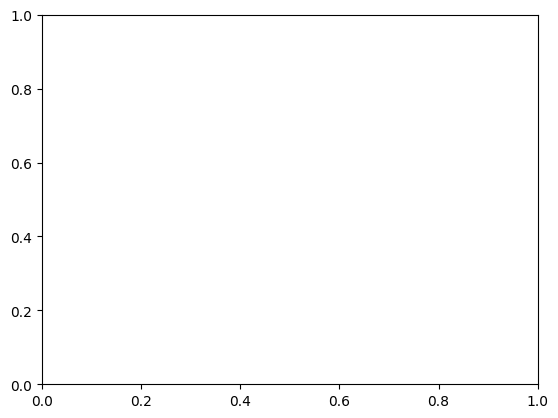

In [60]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.autoscale(False)
from quantum_states import QuantumState

In [61]:
a = np.array([np.sqrt(1/8) for i in range(0, 8)])
ket_zero = np.array([1, 0])
ket_one = np.array([0, 1])
combined = np.kron(ket_zero, ket_one)
hadamard_matrix =np.sqrt(1/4) * np.array([[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1,  1, -1, -1],
       [ 1, -1, -1,  1]])
qc = QuantumState(a)
# qc = qc.apply_gate(hadamard_matrix)

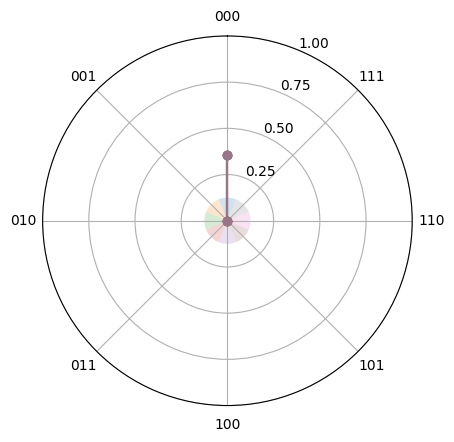

In [64]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

ax.set_rmax(1)
ax.set_ylim([0, 1])
ax.set_rmin(0)
ax.set_rticks([0.25, .5, 0.75, 1])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line


ax.set_theta_offset(np.pi/2)

# ax.set_title("A line plot on a polar axis", va='bottom')

def prepare_plot_and_ax(plt, ax):
    drawing_data = qc.drawing_data()
    qubit_count = np.log2(len(drawing_data))
    number_of_base_states = len(drawing_data)
    ticks = [(i/number_of_base_states) * 2 * np.pi for i in range(0, number_of_base_states)]
    bit_format = '{' + f"0:0{int(qubit_count)}b" + '}'
    bits = [bit_format.format(i) for i in range(0, number_of_base_states)]
    ax.set_xticks(ticks, bits)
    for (vector,  (theta_fill, theta_length)) in drawing_data:
        plt.polar(vector[0],vector[1], marker='o', alpha=0.5)
        ax.fill_between(theta_fill, 0, theta_length, alpha = 0.2)
    
prepare_plot_and_ax(plt, ax)
plt.show()

In [22]:
def pascaline(n):
    n = n 
    line = [1]

    for k in range(max(n ,0)):

        line.append(int(line[k]*(n-k)/(k+1)))

    return line
pascaline(2)

[1, 2, 1]

2
['00', '01', '10', '11']


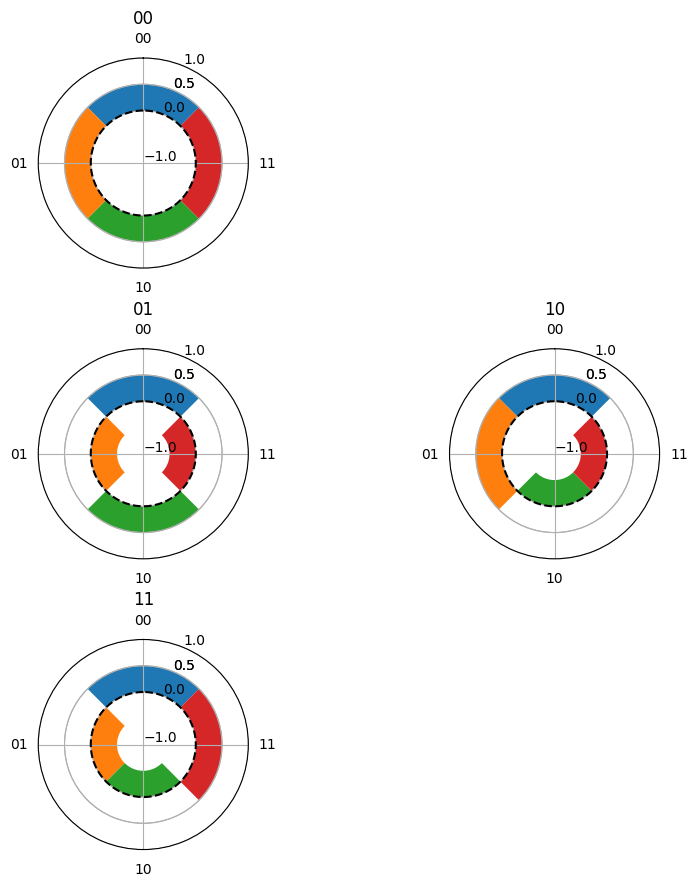

In [89]:
import math

hadamard_matrix =np.sqrt(1/4) * np.array(
      [[ 1,  1,  1,  1],
       [ 1, -1,  1, -1],
       [ 1,  1, -1, -1],
       [ 1, -1, -1,  1]])

dim = hadamard_matrix.shape[0]
qubit_count = int(np.log2(dim))
print(log_2)
ticks = [(i/dim) * 2 * np.pi for i in range(0, dim)]
bit_format = '{' + f"0:0{int(qubit_count)}b" + '}'
bits = [bit_format.format(i) for i in range(0, dim)]
print(bits)
graph_no = pascaline(qubit_count)
# Some example data to display
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)



result = []
amplitude_lengths = dim
rotation = 2 * np.pi / (amplitude_lengths / 2)




fig, axs = plt.subplots(len(graph_no), max(graph_no), subplot_kw=dict(projection='polar'), figsize=(9, 9))
fig.tight_layout(pad=2.0)
idx = 0
for row in range(0, len(graph_no)):
    for col in range(0, graph_no[row]):
        operted_on_axs = axs[row, col]
        operted_on_axs.set_title(bits[idx])
        operted_on_axs.set_rmax(1)
        operted_on_axs.set_rmin(0)
        operted_on_axs.set_rticks([-1, .5, 0, 0.5, 1])  # Less radial ticks
        operted_on_axs.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
        operted_on_axs.set_theta_offset(np.pi/2)
        operted_on_axs.set_xticks(ticks, bits)
        operted_on_axs.set_ylim([-1, 1])
        theta = np.linspace(0, 2*np.pi, 100)
        
        operted_on_axs.plot(theta, [0 for i in range(0, 100)],  color='black', linewidth=1.5, linestyle='dashed')

        for inner_idx in range(0, dim):
            sign_multiplier = 1 if inner_idx % 2 == 1 else -1
            if sign_multiplier == -1:
                theta = np.linspace(math.floor(inner_idx / 2) * rotation + (-np.pi / amplitude_lengths), math.floor(inner_idx / 2) * rotation + (np.pi / amplitude_lengths), 50)
            else:
                theta = np.linspace(math.floor(inner_idx / 2) * rotation + (np.pi / amplitude_lengths), math.floor(inner_idx / 2) * rotation + (3 * np.pi / amplitude_lengths), 50)
            operted_on_axs.fill_between(theta, 0, hadamard_matrix[idx][inner_idx], alpha = 1)


        idx = idx + 1
        
for row in range(0, len(graph_no)):
    for col in range(graph_no[row], max(graph_no)):
         fig.delaxes(axs[row, col])



# axs[0, 0].plot(x, y)
# axs[0, 0].set_title('Axis [0, 0]')
# axs[0, 1].plot(x, y, 'tab:orange')
# axs[0, 1].set_title('Axis [0, 1]')
# axs[1, 0].plot(x, -y, 'tab:green')
# axs[1, 0].set_title('Axis [1, 0]')
# axs[1, 1].plot(x, -y, 'tab:red')
# axs[1, 1].set_title('Axis [1, 1]')

# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()